# Flight Delays

Millions of people fly every day, and flight delays can be an unwelcome aspect of air travel. Just how often do flight delays occur?

In this project, we will work with airport flight data and explore how the day of week affects the likelihood of a delayed departure.

### Loading the Data
The `'atlanta-airport-flights-2023.csv'` file contains a sample of domestic flights going out of the world's busiest airport. Load up the data and take a look.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file into a DataFrame
df = pd.read_csv('flights.csv')
df

,scheduled,actual,carrier,flight,tailnum,origin,dest,air_time,distance
0,"04/29/2023, 16:35","04/29/2023, 17:01",WN,1079,N230WN,ATL,HOU,110.0,696
1,"07/02/2023, 15:10","07/02/2023, 15:05",DL,355,N953AT,ATL,GPT,54.0,352
2,"12/25/2023, 10:55","12/25/2023, 10:53",WN,291,N413WN,ATL,RDU,57.0,356
3,"09/01/2023, 12:50","09/01/2023, 12:48",DL,1132,N947DZ,ATL,TYS,28.0,152
4,"12/14/2023, 07:05","12/14/2023, 07:02",DL,40,N332DN,ATL,BOS,121.0,946
...,...,...,...,...,...,...,...,...,...
4995,"11/15/2023, 14:20","11/15/2023, 14:17",WN,13,N400WN,ATL,MCO,63.0,404
4996,"04/09/2023, 19:50","04/09/2023, 19:58",OH,1320,N567NN,ATL,CLT,42.0,226
4997,"12/14/2023, 13:20","12/14/2023, 13:16",DL,695,N363NB,ATL,DAL,103.0,721
4998,"12/06/2023, 13:05","12/06/2023, 13:01",DL,911,N992AT,ATL,GSO,56.0,306


In [2]:
# Checking the data types of 'scheduled' and 'actual' columns
departures = df[['scheduled', 'actual']]
departures.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   scheduled  5000 non-null   object
 1   actual     5000 non-null   object
dtypes: object(2)
memory usage: 78.3+ KB


Since we found out that the data type of the two columns are not datetime, we have to convert them before doing anything in it.

In [4]:
# Changing the datatypes of 'scheduled' and 'actual' columns to datetime
departures['scheduled'] = pd.to_datetime(departures['scheduled'])
departures['actual'] = pd.to_datetime(departures['actual']) 
departures.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   scheduled  5000 non-null   datetime64[ns]
 1   actual     5000 non-null   datetime64[ns]
dtypes: datetime64[ns](2)
memory usage: 78.3 KB


C:\Users\Joseph\AppData\Local\Temp\ipykernel_11712\3553020428.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  departures['scheduled'] = pd.to_datetime(departures['scheduled'])
C:\Users\Joseph\AppData\Local\Temp\ipykernel_11712\3553020428.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  departures['actual'] = pd.to_datetime(departures['actual'])


In [5]:
# Display departures
departures

,scheduled,actual
0,2023-04-29 16:35:00,2023-04-29 17:01:00
1,2023-07-02 15:10:00,2023-07-02 15:05:00
2,2023-12-25 10:55:00,2023-12-25 10:53:00
3,2023-09-01 12:50:00,2023-09-01 12:48:00
4,2023-12-14 07:05:00,2023-12-14 07:02:00
...,...,...
4995,2023-11-15 14:20:00,2023-11-15 14:17:00
4996,2023-04-09 19:50:00,2023-04-09 19:58:00
4997,2023-12-14 13:20:00,2023-12-14 13:16:00
4998,2023-12-06 13:05:00,2023-12-06 13:01:00


We can now use this data to answer our question. First we can use the two columns to calculate and identify the delayed flight schedules. 

In [9]:
departures['delay'] = departures['actual'] - departures['scheduled']
departures

C:\Users\Joseph\AppData\Local\Temp\ipykernel_11712\903838772.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  departures['delay'] = departures['actual'] - departures['scheduled']


,scheduled,actual,delay
0,2023-04-29 16:35:00,2023-04-29 17:01:00,0 days 00:26:00
1,2023-07-02 15:10:00,2023-07-02 15:05:00,-1 days +23:55:00
2,2023-12-25 10:55:00,2023-12-25 10:53:00,-1 days +23:58:00
3,2023-09-01 12:50:00,2023-09-01 12:48:00,-1 days +23:58:00
4,2023-12-14 07:05:00,2023-12-14 07:02:00,-1 days +23:57:00
...,...,...,...
4995,2023-11-15 14:20:00,2023-11-15 14:17:00,-1 days +23:57:00
4996,2023-04-09 19:50:00,2023-04-09 19:58:00,0 days 00:08:00
4997,2023-12-14 13:20:00,2023-12-14 13:16:00,-1 days +23:56:00
4998,2023-12-06 13:05:00,2023-12-06 13:01:00,-1 days +23:56:00


The way we interpret the delay column is that: negative days mean that the flight departed earlier that then schedule time, to calculate how early each flight departed we just need to count until the time reaches '00:00:00'. 

Any other rows that exceed '0 days 00:00:00' are the flights who departed later than the scheduled time.

To easily identify which flights are actually late, we can identify which of them left within the grace period of 15 minutes. Once past the 15 minute mark, they are considered late.

In [10]:
# Identify late flights
departures['is_late'] = departures['delay'] > pd.Timedelta(minutes=15)
departures


C:\Users\Joseph\AppData\Local\Temp\ipykernel_11712\131902825.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  departures['is_late'] = departures['delay'] > pd.Timedelta(minutes=15)


,scheduled,actual,delay,is_late
0,2023-04-29 16:35:00,2023-04-29 17:01:00,0 days 00:26:00,True
1,2023-07-02 15:10:00,2023-07-02 15:05:00,-1 days +23:55:00,False
2,2023-12-25 10:55:00,2023-12-25 10:53:00,-1 days +23:58:00,False
3,2023-09-01 12:50:00,2023-09-01 12:48:00,-1 days +23:58:00,False
4,2023-12-14 07:05:00,2023-12-14 07:02:00,-1 days +23:57:00,False
...,...,...,...,...
4995,2023-11-15 14:20:00,2023-11-15 14:17:00,-1 days +23:57:00,False
4996,2023-04-09 19:50:00,2023-04-09 19:58:00,0 days 00:08:00,False
4997,2023-12-14 13:20:00,2023-12-14 13:16:00,-1 days +23:56:00,False
4998,2023-12-06 13:05:00,2023-12-06 13:01:00,-1 days +23:56:00,False


With that, we can now identify which flights are late.

Now, we need to identfy how the days of the week might affect the delayed flights. First, we have to identify each flight's day of the week.

In [24]:
departures['day_name'] = departures['actual'].dt.strftime('%a')
# Only display late flights
departures = departures.query("is_late == False")
departures

,scheduled,actual,delay,is_late,day_name
1,2023-07-02 15:10:00,2023-07-02 15:05:00,-1 days +23:55:00,False,Sun
2,2023-12-25 10:55:00,2023-12-25 10:53:00,-1 days +23:58:00,False,Mon
3,2023-09-01 12:50:00,2023-09-01 12:48:00,-1 days +23:58:00,False,Fri
4,2023-12-14 07:05:00,2023-12-14 07:02:00,-1 days +23:57:00,False,Thu
5,2023-08-27 23:25:00,2023-08-27 23:26:00,0 days 00:01:00,False,Sun
...,...,...,...,...,...
4991,2023-11-17 23:35:00,2023-11-17 23:28:00,-1 days +23:53:00,False,Fri
4995,2023-11-15 14:20:00,2023-11-15 14:17:00,-1 days +23:57:00,False,Wed
4996,2023-04-09 19:50:00,2023-04-09 19:58:00,0 days 00:08:00,False,Sun
4997,2023-12-14 13:20:00,2023-12-14 13:16:00,-1 days +23:56:00,False,Thu


Great, now we have the days. The next step is to calculate the number of late flights that fall under each days of the week. For this, we can just use df.group() and sum(). In the previous code we can see that we already filtered out the late flights, it was done to make it easier to count the flights. 

We will also need to re-arrange the days in a much proper way.

In [44]:

# Number of flights per day of the week
solution = departures.value_counts('day_name')
solution = solution.reindex(['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat']).reset_index(name='flights')
solution.columns = ['day_name', 'flights']

We can now graph the result!

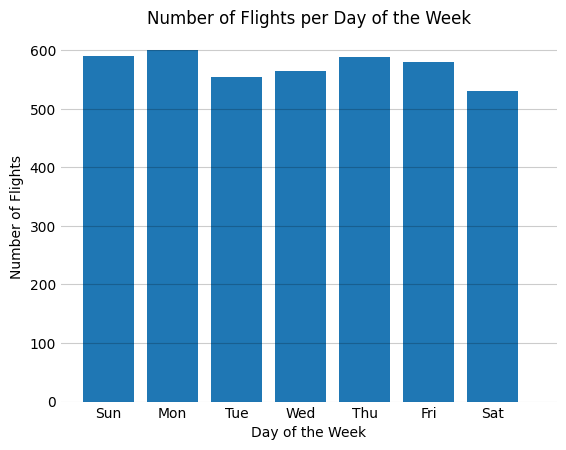

In [50]:
def clean_bar_axes( ):
    ax = plt.gca()
    ax.spines[['top', 'bottom', 'right' , 'left']].set_visible(False)
    ax.grid(axis='y', color='black', alpha=0.2)
    ax.tick_params(axis='both', length=0)
    ax.set_xticks([0,1, 2, 3, 4,5,6,7])

plt.bar(solution['day_name'], solution['flights'])
plt.xlabel('Day of the Week')
plt.ylabel('Number of Flights')
plt.title('Number of Flights per Day of the Week')
clean_bar_axes()

The day of the week with the fewest delated flight is Saturday. According to a quick research, Saturday likely has the fewest delayed flights because it is typically a less busy travel day compared to weekdays. Business travel is lower, and many airlines schedule fewer flights, reducing congestion at airports. With less air traffic and fewer passengers, there are fewer opportunities for delays caused by scheduling conflicts, airspace congestion, or operational bottlenecks.